In [6]:
#[0]
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
import json #https://stackoverflow.com/questions/7100125/storing-python-dictionaries
import pickle #https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import os
#[1]
from sklearn.manifold import MDS
from scipy.spatial import procrustes
import matplotlib.pyplot as plt

%matplotlib inline

#[2]
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

#[3]
from sklearn import decomposition
from scipy.spatial import distance_matrix

In [9]:
n_article_sentiments = [66,40,21,13,18,19,27,53,37,44,16]
article_sentiments = [get_sentiments()[s] for s in n_article_sentiments]

In [29]:
article_vecs = []
article_vecs += [[-0.133,-0.588,-0.293]]
article_vecs += [[-0.386,-0.389,-0.264]]
article_vecs += [[-0.412,0.095,-0.481]]
article_vecs += [[0.794,-0.347,0.273]]
article_vecs += [[-0.478,-0.165,0.409]]
article_vecs += [[0.795,0.163,-0.182]] #hope
article_vecs += [[-0.483,0.256,0.280]] #contemp
article_vecs += [[-0.190,0.484,-0.199]]#guilt
article_vecs += [[-0.277,0.183,0.496]]#enviou
article_vecs += [[-0.345,0.183,-0.237]]#disappoin
article_vecs += [[-0.101,-0.535,0.308]]#jealous


In [24]:
embs = get_final_embs()


In [106]:
#Metricas de comparacao entre nossos sentimentos
a = []
b = []
for e in embs:
    tmp = [e[i] for i in n_article_sentiments]
    tmp = MDS(n_components=3,n_init=30).fit_transform(tmp)
    a,b,r = procrustes(article_vecs,tmp)
    a_dist = distance_matrix(a,a)
    b_dist = distance_matrix(b,b)
    r2 = np.sum((a_dist - b_dist)**2)
    print(r2,r)

5.105131737120123 0.6144685266345125
9.115365336264215 0.8222523994087603
11.553382838810393 0.8957347791178059
8.184893298918178 0.7859525120248784
8.921863911060171 0.8162951228452402
9.136639733576025 0.8233922390478696
12.088923665359715 0.9080634144870388
5.518467940582779 0.6217244568007068


In [80]:
# Teste de estrutura, permuta-1
erro = []
original = article_vecs.copy()
for i in range(1000):
    tmp = article_vecs.copy()
    for j in range(2):
        a =np.random.randint(11)
        b =np.random.randint(11)
        tmp[a] = original[b]
        tmp[b] = original[a]

    a_dist = distance_matrix(tmp,tmp)
    b_dist = distance_matrix(original,original)
    r2 = np.sum((a_dist - b_dist)**2)
    erro += [r2]
np.mean(erro)

11.104730409424869

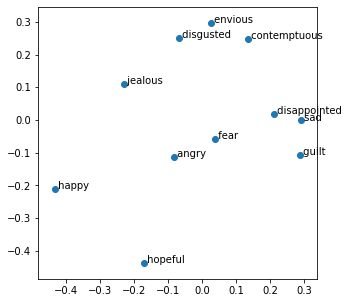

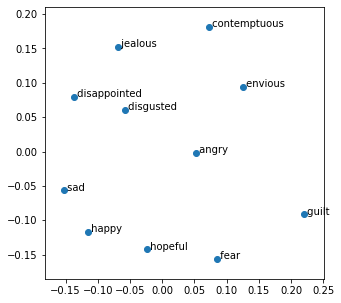

In [107]:
a = MDS(n_components=2,n_init=10).fit_transform(a)
b = MDS(n_components=2).fit_transform(b)
a,b,r = procrustes(a,b)
print_anotado(a,article_sentiments,figsize=(5,5))
print_anotado(b,article_sentiments,figsize=(5,5))

In [31]:
MDS(n_components=3).fit_transform(embs[0])

array([[-3.42766703e-02,  6.41594504e-02, -3.94325632e-02],
       [-3.29706628e-02, -8.84815060e-03,  6.47605913e-02],
       [-1.26344214e-02,  3.39578900e-02, -6.83842444e-02],
       [-7.48634211e-02, -1.07395352e-02, -5.01374745e-02],
       [-7.09967790e-02, -2.67597345e-02,  1.18415545e-02],
       [ 6.87469324e-02,  1.08148221e-02,  1.66732236e-03],
       [ 4.06234302e-02,  1.02330990e-01, -1.08388044e-01],
       [ 8.36975523e-02,  2.61011105e-02,  5.18401424e-02],
       [-8.33449491e-02,  7.83078962e-02, -7.45777863e-02],
       [-7.20405161e-02,  3.98112956e-02,  6.03255343e-02],
       [ 1.06142467e-01,  8.53698569e-02, -6.32957669e-03],
       [ 1.03001723e-01, -1.19198001e-01,  1.82683013e-02],
       [-3.99860641e-02,  5.93839134e-02,  3.55142298e-02],
       [-3.64431455e-02, -3.27826813e-02, -1.21129045e-01],
       [-5.60976391e-02, -1.27944418e-02, -7.69257172e-02],
       [-2.95084820e-02,  8.71324181e-02,  3.20911417e-02],
       [-1.88787307e-02, -1.01927933e-01

In [26]:
article_distance_matrix

array([[-2.03154631, -1.23461257, -0.15414194,  0.71182876,  0.16119657,
         0.9249051 ,  0.62787152,  0.62570316,  0.7117534 , -0.05498825,
        -0.54173052],
       [-1.23461257, -2.03154631, -0.72204289,  1.16696366, -0.26787349,
         1.18937031,  0.06278291,  0.18053865,  0.32931915, -0.61589739,
        -0.41510023],
       [-0.15414194, -0.72204289, -2.03154631,  1.64108742,  0.26057109,
         1.03927235, -0.10552816, -0.72644283,  0.41013663, -1.37095271,
         0.57356113],
       [ 0.71182876,  1.16696366,  1.64108742, -2.03154631,  1.15465089,
        -0.34622414,  1.45078935,  1.35089041,  0.96592228,  1.31176323,
         0.22519975],
       [ 0.16119657, -0.26787349,  0.26057109,  1.15465089, -2.03154631,
         1.52251855, -0.94571426,  0.27347089, -1.01762482, -0.19269813,
        -0.70541178],
       [ 0.9249051 ,  1.18937031,  1.03927235, -0.34622414,  1.52251855,
        -2.03154631,  1.32723708,  0.52337814,  1.09654989,  0.78321963,
         1.018

In [73]:
def get_emb_soma():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_soma = np.zeros_like(embeddings[0])
    for i in embeddings:
        for c in range(75):
            assemble_embeddings_soma[c] = assemble_embeddings_soma[c] + i[c]
    return assemble_embeddings_soma

def get_emb_concat():
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_concat = []

    for c in range(75):
        tmp = np.array([])
        for i in embeddings:
            tmp = np.concatenate((tmp,i[c]))
        assemble_embeddings_concat += [tmp]
    return assemble_embeddings_concat


def get_emb_media():
    #média dos vetores e retirando outliers
    embeddings = get_clean_embeddings()
    sentiments = get_sentiments()
    assemble_embeddings_media = np.zeros_like(embeddings[0])
    vec = []
    dist = []
    for c in range(75):
        tmp = np.array([])
        vec = []
        for i in embeddings:
            vec += [i[c]]

        centroid = np.zeros_like(vec[0])
        for i in vec:
            centroid = centroid + i
        centroid = centroid/len(vec)

        dist = []
        for i in vec:
            dist += [np.linalg.norm(i-centroid)]

        limitante_distancia_para_corte = np.max(dist)

        counter = 0
        for n,i in enumerate(embeddings):
            if dist[n]!=limitante_distancia_para_corte:
                assemble_embeddings_media[c] += i[c] 
                counter+=1

        assemble_embeddings_media[c] = assemble_embeddings_media[c]/counter
    return assemble_embeddings_media


def get_clean_embeddings():
#Seleciona somente os vetores principais das nossas embeddings
    sentiments = get_sentiments()
    raw_embeddings = []
    dimensions_size = []
    for i in range(5):
        tmp = get_vectors_embedding(i)
        raw_embeddings += [tmp]
        dimensions_size+=[len(get_sentiment_vector(tmp,sentiments[0]))]
#Faz o corte para o menor tamanho de dimensão
    n_dimensions = np.min(dimensions_size)
    # n_dimensions = 10
    mds = MDS(n_components=n_dimensions)
#Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(5):
        tmp_embedding = []
        for s in sentiments:
            tmp_embedding += [get_sentiment_vector(raw_embeddings[i],s)]
        transformed_embedding = mds.fit_transform(tmp_embedding)
        embeddings += [transformed_embedding]
    # Calcula erro entre nossos modelos
    for a in range(len(embeddings)):
        for b in range(len(embeddings)):
            embeddings[a],embeddings[b],r = procrustes(embeddings[a],embeddings[b])
    return embeddings

def print_anotado(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(emb[:,0], emb[:,1])
    n = get_sentiments()
    
    for i, txt in enumerate(n):
        ax.annotate(" "+txt, (emb[:,0][i], emb[:,1][i]))

        
def print_anotado(emb, lista_nomes,figsize=(15,15)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(emb[:,0], emb[:,1])
    n = lista_nomes
    
    for i, txt in enumerate(n):
        ax.annotate(" "+txt, (emb[:,0][i], emb[:,1][i]))


def print_anotado2(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    for e in emb:
        ax.scatter(e[:,0], e[:,1])
        n = get_sentiments()

        for i, txt in enumerate(n):
            ax.annotate(txt, (e[:,0][i], e[:,1][i]))

def print_2d(embs):
    res = []
    mds_2 = MDS(n_components=2)
    for e in embs:
        res += [mds_2.fit_transform(e)]
    for p in res:
        plt.scatter(p[:,0],p[:,1])

def get_sentiment_vector(embedding, sentiment):
    return embedding[sentiment]["vectors"][sentiment]

def get_vectors_embedding(n):
    files = os.listdir("models")
    model_file_name = []
    for file in files:
        model_file_name += [file]
    escolhidos = [model_file_name[11],model_file_name[14],model_file_name[5],model_file_name[7],model_file_name[3]]
    with open("models/"+escolhidos[n], 'rb') as handle:
        b = pickle.load(handle)
    return b

def get_sentiments():
    sentiments = np.load("./sentiments_list.npy")
    return sentiments

In [3]:
def get_final_embs(dimensions = 200):
    embs = get_clean_embeddings()
    embs += [get_emb_soma()]
    embs += [get_emb_concat()]
    embs += [get_emb_media()]


    mds = MDS(n_components=dimensions)
    #Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(len(embs)):
        transformed_embedding = mds.fit_transform(embs[i])
        embeddings += [transformed_embedding]
    embs = embeddings

    for a in range(len(embs)):
        for b in range(len(embs)):
            embs[a],embs[b],r = procrustes(embs[a],embs[b])
    return embs